In [159]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

In [31]:
df = pd.read_csv('spam.csv' ,encoding='Windows-1252' )

In [32]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.shape

(5572, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning 

In [35]:
# Check The Null 
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [36]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace = True)

In [39]:
# rename columns 
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)

In [42]:
# Label Encoder 
labelEncoder = LabelEncoder()

df['target'] = labelEncoder.fit_transform(df['target'])

In [47]:
# Check For Duplication 
df.duplicated().sum()

403

In [50]:
# Drop Duplicated Columns 

df.drop_duplicates(keep='first' , inplace=True)
df.duplicated().sum()


0

In [51]:
df.shape

(5169, 2)

# EDA  (Exploratory Data Analysis)

In [54]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

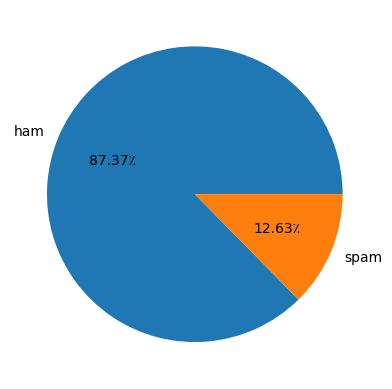

In [66]:
# The Ratio Of Ham/Spam SMS

plt.pie(df['target'].value_counts(), labels=['ham' , 'spam'] , autopct="%0.2f٪")
plt.show()

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedenbah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [91]:
# num_characters
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [92]:
# num_words
df['num_words'] = df['text'].apply(lambda x : len(word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [94]:
# num_sentences
df['num_sentences'] = df['text'].apply(lambda x : len(sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [97]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [104]:
# Check The num for ham sms 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
# Check The num for ham sms 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

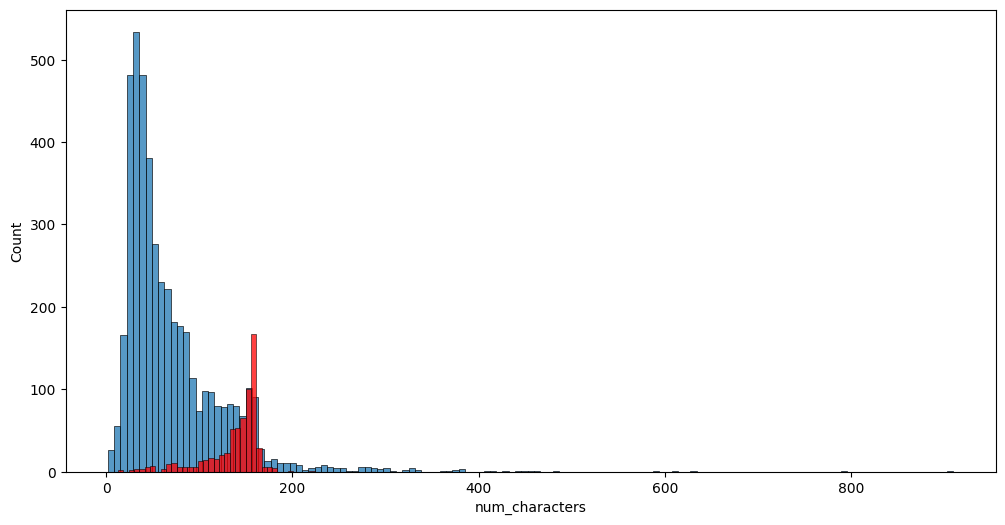

In [113]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

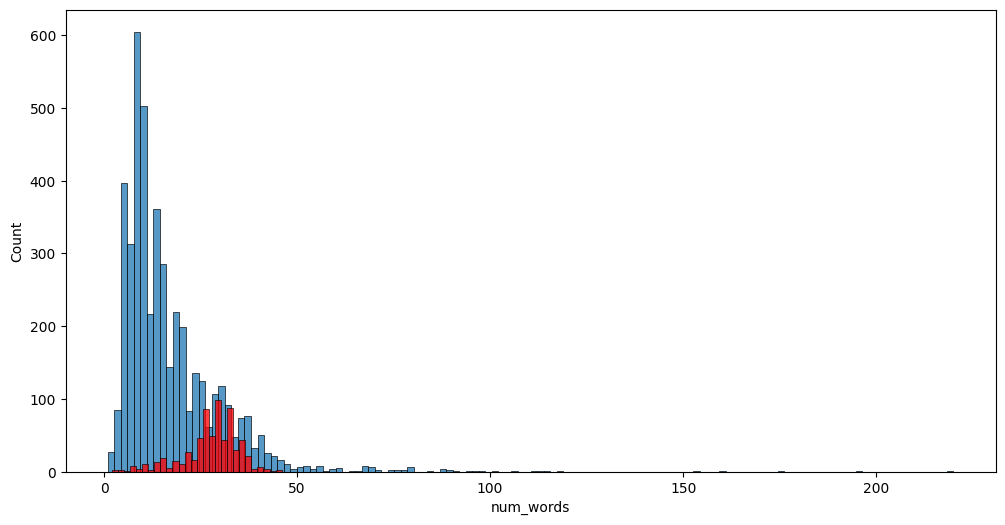

In [117]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color='red')

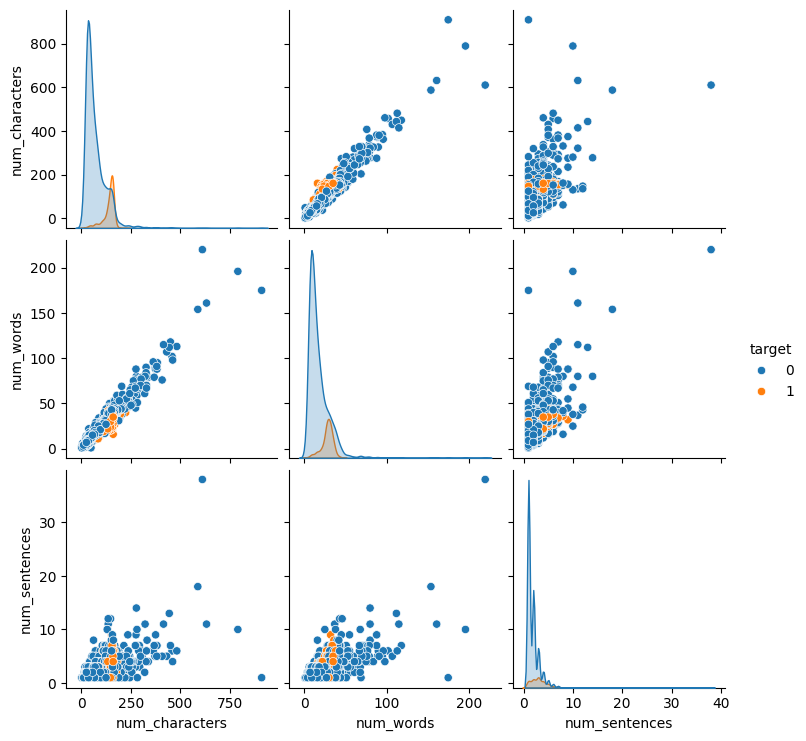

In [119]:
# The Relation Between Two Features Each time 
sns.pairplot(df , hue='target')

<Axes: >

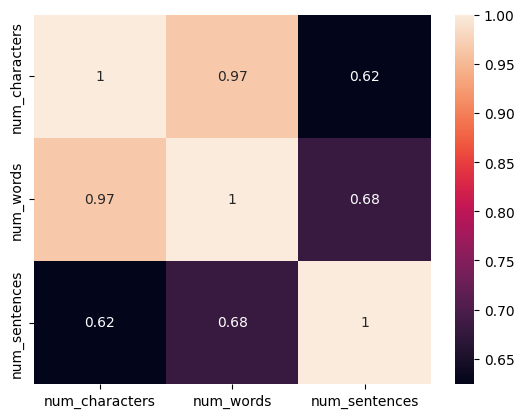

In [126]:
# Check The Correlation Between Featuers 
sns.heatmap(df[['num_characters','num_words','num_sentences']].corr(), annot=True)


# Data Preprocessing 

* Remove Special Characters , Punctuations, Stop words
* Lower Case
* Tokenization
* Stemmeing 

In [209]:
stemmer = PorterStemmer()

def transform_text(text):
    text = re.sub('[^a-zA-Z]' , ' ' , text)
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(x) for x in text if x not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [213]:
df['transform_text'] = df['text'].apply(transform_text)

In [214]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [254]:
spam_corpus = []

spam_list = df[df['target'] == 1]['transform_text'].to_list()

for msg in spam_list:
    for word in msg.split():
        spam_corpus.append(word)

In [255]:
ham_corpus = []

ham_list = df[df['target'] == 0]['transform_text'].to_list()

for msg in ham_list:
    for word in msg.split():
        ham_corpus.append(word)

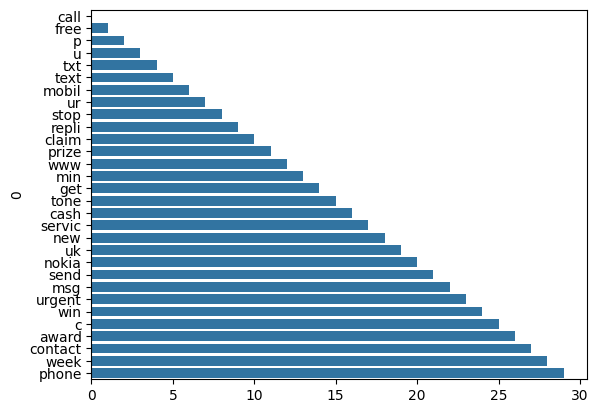

In [259]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.show()

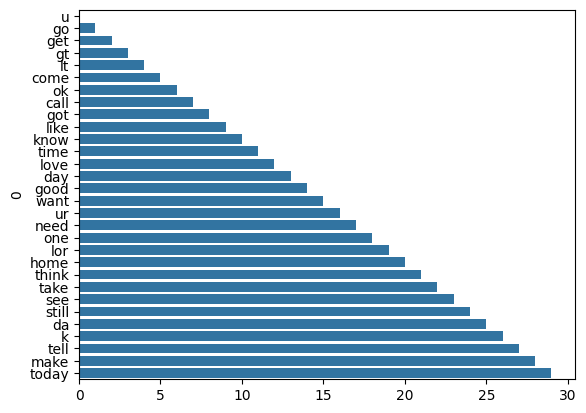

In [260]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.show()

# Model Building

In [454]:
X = df['transform_text'].values
y = df['target'].values

In [455]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=2)

In [456]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(X_train) 
X_test = tfidf.transform(X_test) 

In [457]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train.toarray())
X_test_sc = sc.transform(X_test.toarray())

In [458]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [459]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [463]:
gnb.fit(X_train_sc , y_train)

y_pred = gnb.predict(X_test_sc)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8636363636363636
[[778 118]
 [ 23 115]]
0.49356223175965663


In [464]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[896   0]
 [ 38 100]]
1.0


In [465]:
# I Will Try Another Models to get the best choices 

In [547]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [500]:
svc = SVC(kernel='sigmoid' , gamma=1)
knn = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()

In [501]:
classifers = {
    'svc':svc,
    'knn':knn,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc
}

In [514]:
def train_classifier(classifier , X_train , X_test , y_train , y_test):
    classifier.fit(X_train , y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion = confusion_matrix(y_test,y_pred)
    print(".......................................................")
    print("Selected Classifier :" , classifier)
    print("accuracy_score :" , accuracy)
    print("precission_score :" , precision)
    print("confission_matrix :" , confusion)

    return accuracy ,precision
    

In [518]:
accuracy_scores = []
precision_scores = []

for name,model in classifers.items() :
    current_accuracy,current_precision = train_classifier(model , X_train , X_test , y_train , y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

.......................................................
Selected Classifier : SVC(gamma=1, kernel='sigmoid')
accuracy_score : 0.97678916827853
precission_score : 0.9672131147540983
confission_matrix : [[892   4]
 [ 20 118]]
.......................................................
Selected Classifier : KNeighborsClassifier()
accuracy_score : 0.9081237911025145
precission_score : 1.0
confission_matrix : [[896   0]
 [ 95  43]]
.......................................................
Selected Classifier : MultinomialNB()
accuracy_score : 0.9632495164410058
precission_score : 1.0
confission_matrix : [[896   0]
 [ 38 100]]
.......................................................
Selected Classifier : DecisionTreeClassifier(max_depth=5)
accuracy_score : 0.9352030947775629
precission_score : 0.8317757009345794
confission_matrix : [[878  18]
 [ 49  89]]
.......................................................
Selected Classifier : LogisticRegression()
accuracy_score : 0.9622823984526112
precission_

In [524]:
pd.DataFrame({'Algorithm':classifers.keys()})

,Algorithm
0,svc
1,knn
2,mnb
3,dtc
4,lrc


In [540]:
classifier_res_df = pd.DataFrame({'classifier':classifers.keys(),'accuracy_score' : accuracy_scores , 'precision_score':precision_scores}).sort_values('precision_score',ascending=False)
classifier_res_df

,classifier,accuracy_score,precision_score
1,knn,0.908124,1.000000
2,mnb,0.963250,1.000000
4,lrc,0.962282,0.971429
0,svc,0.976789,0.967213
3,dtc,0.935203,0.831776


In [542]:
performance_df1 = pd.melt(classifier_res_df, id_vars = "classifier")
performance_df1

,classifier,variable,value
0,knn,accuracy_score,0.908124
1,mnb,accuracy_score,0.963250
2,lrc,accuracy_score,0.962282
3,svc,accuracy_score,0.976789
4,dtc,accuracy_score,0.935203
5,knn,precision_score,1.000000
6,mnb,precision_score,1.000000
7,lrc,precision_score,0.971429
8,svc,precision_score,0.967213
9,dtc,precision_score,0.831776


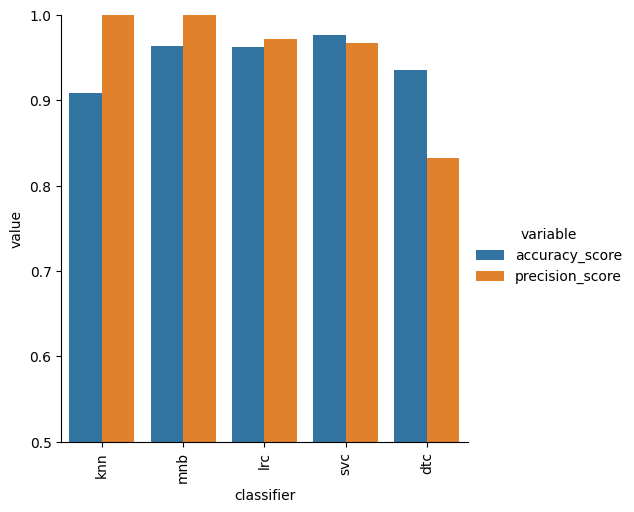

In [544]:
sns.catplot(x = 'classifier', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [550]:
from sklearn.ensemble import StackingClassifier

In [555]:
# Apply Stacking 
estimators = [('svc', svc) , ('mnb' , mnb) , ('lrc' , lrc)]
final_estimator=RandomForestClassifier()

In [556]:
clf = StackingClassifier(estimators=estimators , final_estimator=final_estimator)

In [561]:
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

print("accuracy_score :" , accuracy_score(y_test , y_pred))
print("confusion_matrix :" , confusion_matrix(y_test , y_pred))
print("precision_score :" , precision_score(y_test , y_pred))

acc : 0.9816247582205029
acc : [[892   4]
 [ 15 123]]
acc : 0.968503937007874


### Select The Final Model => mnb = MultinomialNB()

In [563]:
import pickle 
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb')) 